Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 38887s 50s/step - accuracy: 0.4762 - loss: 1.4786 - val_accuracy: 0.6397 - val_loss: 1.1405
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 40244s 50s/step - accuracy: 0.7460 - loss: 0.7248 - val_accuracy: 0.6860 - val_loss: 0.9805
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 1883s 2s/step - accuracy: 0.8252 - loss: 0.5077 - val_accuracy: 0.7445 - val_loss: 0.7688
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2708s 3s/step - accuracy: 0.8661 - loss: 0.3841 - val_accuracy: 0.7931 - val_loss: 0.6552
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2803s 4s/step - accuracy: 0.9066 - loss: 0.2680 - val_accuracy: 0.7796 - val_loss: 0.7245
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 1323s 2s/step - accuracy: 0.9353 - loss: 0.1881 - val_accuracy: 0.7904 - val_loss: 0.7551
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 1119s 1s/step - accuracy: 0.9526 - loss: 0.1334 - val_accuracy: 0.7983 - val_loss: 0.7262
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 1059s 1s/step - accuracy: 0.9688 - loss: 0.092

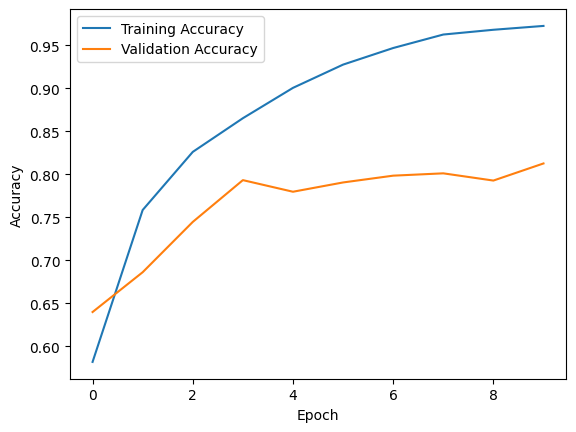

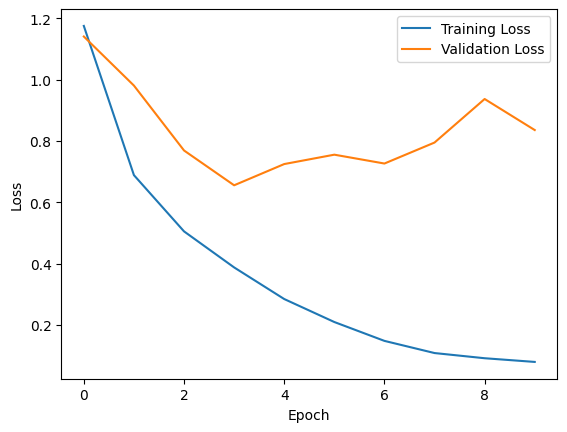

In [1]:
#I acknowledge using Artificial Intelligence for generating this code.


import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the images to the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert class vectors to one-hot encoded labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)



def conv_block(x, filters, kernel_size=3, stride=1):
    x_shortcut = x
    x = layers.Conv2D(filters, kernel_size, strides=stride, padding='same', kernel_initializer='he_normal')(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    x = layers.Conv2D(filters, kernel_size, strides=1, padding='same', kernel_initializer='he_normal')(x)
    x = layers.BatchNormalization()(x)

    if stride != 1 or x_shortcut.shape[-1] != filters:
        x_shortcut = layers.Conv2D(filters, kernel_size=1, strides=stride, padding='same', kernel_initializer='he_normal')(x_shortcut)
        x_shortcut = layers.BatchNormalization()(x_shortcut)

    x = layers.add([x, x_shortcut])
    x = layers.ReLU()(x)
    return x

def build_resnet18(input_shape=(32, 32, 3), num_classes=10):
    inputs = layers.Input(shape=input_shape)

    # Initial convolutional layer
    x = layers.Conv2D(64, 3, strides=1, padding='same', kernel_initializer='he_normal')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    # Residual blocks
    x = conv_block(x, 64, stride=1)
    x = conv_block(x, 64, stride=1)

    x = conv_block(x, 128, stride=2)
    x = conv_block(x, 128, stride=1)

    x = conv_block(x, 256, stride=2)
    x = conv_block(x, 256, stride=1)

    x = conv_block(x, 512, stride=2)
    x = conv_block(x, 512, stride=1)

    # Pooling and output layer
    x = layers.GlobalAveragePooling2D()(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    # Model
    model = models.Model(inputs, outputs)
    return model



# Build the model
model = build_resnet18()

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=64,
                    validation_data=(x_test, y_test))




# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()



